In [2]:
import pandas as pd
import numpy as np
#import lightgbm as lgb
import optuna.integration.lightgbm as lgb

# Import Local funcs
import sys
sys.path.append('../')
from utils.utils import *

/Users/zaza/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from lightgbm import early_stopping
from lightgbm import log_evaluation
from sklearn.model_selection import KFold

In [3]:
X, y = get_training()
X = X.select_dtypes(exclude=['object'])
dtrain = lgb.Dataset(X, label=y)

In [6]:
params = {
    "boosting_type": "gbdt",
    "objective": "multiclass",
    "metric": "multi_logloss",
    "verbosity": -2,
    "num_class" : 5,
    "boost_from_average": True,
}

In [7]:

tuner = lgb.LightGBMTunerCV(
    params,
    dtrain,
    folds=KFold(n_splits=3),
    callbacks=[early_stopping(100), log_evaluation(100)],
)

tuner.run()

print("Best score:", tuner.best_score)
best_params = tuner.best_params
print("Best params:", best_params)
print("  Params: ")
for key, value in best_params.items():
    print("    {}: {}".format(key, value))

[I 2024-03-27 02:24:39,203] A new study created in memory with name: no-name-c5770d34-a363-41e7-85e7-6cd1d9938040


Training until validation scores don't improve for 100 rounds
[100]	cv_agg's multi_logloss: 0.857363 + 0.00669111


[I 2024-03-27 02:25:14,687] Trial 0 finished with value: 0.8571506065282538 and parameters: {'feature_fraction': 0.7}. Best is trial 0 with value: 0.8571506065282538.


Early stopping, best iteration is:
[96]	cv_agg's multi_logloss: 0.857151 + 0.00666089
[100]	cv_agg's multi_logloss: 0.853873 + 0.00499816


[I 2024-03-27 02:25:48,430] Trial 1 finished with value: 0.8538327937445076 and parameters: {'feature_fraction': 0.4}. Best is trial 1 with value: 0.8538327937445076.


Early stopping, best iteration is:
[98]	cv_agg's multi_logloss: 0.853833 + 0.00485234
[100]	cv_agg's multi_logloss: 0.85531 + 0.00514798


[I 2024-03-27 02:26:28,632] Trial 2 finished with value: 0.8552208931333323 and parameters: {'feature_fraction': 0.5}. Best is trial 1 with value: 0.8538327937445076.


Early stopping, best iteration is:
[98]	cv_agg's multi_logloss: 0.853833 + 0.00485234
[100]	cv_agg's multi_logloss: 0.85551 + 0.00556075


[I 2024-03-27 02:27:15,272] Trial 3 finished with value: 0.8554991130303705 and parameters: {'feature_fraction': 0.6}. Best is trial 1 with value: 0.8538327937445076.


Early stopping, best iteration is:
[98]	cv_agg's multi_logloss: 0.853833 + 0.00485234
[100]	cv_agg's multi_logloss: 0.860467 + 0.00632299


[I 2024-03-27 02:28:27,827] Trial 4 finished with value: 0.8604699537606297 and parameters: {'feature_fraction': 0.8999999999999999}. Best is trial 1 with value: 0.8538327937445076.


Early stopping, best iteration is:
[98]	cv_agg's multi_logloss: 0.853833 + 0.00485234
[100]	cv_agg's multi_logloss: 0.860635 + 0.00790395


[I 2024-03-27 02:29:26,443] Trial 5 finished with value: 0.8606911451942879 and parameters: {'feature_fraction': 1.0}. Best is trial 1 with value: 0.8538327937445076.


Early stopping, best iteration is:
[98]	cv_agg's multi_logloss: 0.853833 + 0.00485234
[100]	cv_agg's multi_logloss: 0.857232 + 0.00416313


[I 2024-03-27 02:30:30,615] Trial 6 finished with value: 0.8570958699099407 and parameters: {'feature_fraction': 0.8}. Best is trial 1 with value: 0.8538327937445076.
feature_fraction, val_score: 0.853833: 100%|##########| 7/7 [05:51<00:00, 50.20s/it]


Early stopping, best iteration is:
[98]	cv_agg's multi_logloss: 0.853833 + 0.00485234


[100]	cv_agg's multi_logloss: 0.864571 + 0.00708482


[I 2024-03-27 02:31:38,711] Trial 7 finished with value: 0.8641181311477526 and parameters: {'num_leaves': 71}. Best is trial 7 with value: 0.8641181311477526.


Early stopping, best iteration is:
[98]	cv_agg's multi_logloss: 0.853833 + 0.00485234
[100]	cv_agg's multi_logloss: 0.86142 + 0.00677904


[I 2024-03-27 02:32:39,966] Trial 8 finished with value: 0.8611549514361636 and parameters: {'num_leaves': 58}. Best is trial 8 with value: 0.8611549514361636.


Early stopping, best iteration is:
[98]	cv_agg's multi_logloss: 0.853833 + 0.00485234
[100]	cv_agg's multi_logloss: 0.869751 + 0.00746929


[I 2024-03-27 02:33:44,344] Trial 9 finished with value: 0.869173829366496 and parameters: {'num_leaves': 82}. Best is trial 8 with value: 0.8611549514361636.


Early stopping, best iteration is:
[98]	cv_agg's multi_logloss: 0.853833 + 0.00485234
[100]	cv_agg's multi_logloss: 0.923199 + 0.0113819


[I 2024-03-27 02:36:36,862] Trial 10 finished with value: 0.9204432737105707 and parameters: {'num_leaves': 238}. Best is trial 8 with value: 0.8611549514361636.


Early stopping, best iteration is:
[98]	cv_agg's multi_logloss: 0.853833 + 0.00485234
[100]	cv_agg's multi_logloss: 0.909719 + 0.010918


[I 2024-03-27 02:38:44,146] Trial 11 finished with value: 0.9075567927842053 and parameters: {'num_leaves': 199}. Best is trial 8 with value: 0.8611549514361636.


Early stopping, best iteration is:
[98]	cv_agg's multi_logloss: 0.853833 + 0.00485234
[100]	cv_agg's multi_logloss: 0.877322 + 0.00371479


[I 2024-03-27 02:39:15,942] Trial 12 finished with value: 0.8780163428134632 and parameters: {'num_leaves': 5}. Best is trial 8 with value: 0.8611549514361636.


Early stopping, best iteration is:
[98]	cv_agg's multi_logloss: 0.853833 + 0.00485234
[100]	cv_agg's multi_logloss: 0.899794 + 0.0114473


[I 2024-03-27 02:41:25,903] Trial 13 finished with value: 0.8980674793865315 and parameters: {'num_leaves': 173}. Best is trial 8 with value: 0.8611549514361636.


Early stopping, best iteration is:
[98]	cv_agg's multi_logloss: 0.853833 + 0.00485234
[100]	cv_agg's multi_logloss: 0.890365 + 0.0109236


[I 2024-03-27 02:43:08,623] Trial 14 finished with value: 0.8889093583362336 and parameters: {'num_leaves': 140}. Best is trial 8 with value: 0.8611549514361636.


Early stopping, best iteration is:
[98]	cv_agg's multi_logloss: 0.853833 + 0.00485234
[100]	cv_agg's multi_logloss: 0.92639 + 0.0101125


[I 2024-03-27 02:45:55,299] Trial 15 finished with value: 0.9234864928051709 and parameters: {'num_leaves': 252}. Best is trial 8 with value: 0.8611549514361636.



Early stopping, best iteration is:
[98]	cv_agg's multi_logloss: 0.853833 + 0.00485234


num_leaves, val_score: 0.853833:  45%|####5     | 9/20 [15:24<22:18, 121.69s/it]

[100]	cv_agg's multi_logloss: 0.935363 + 0.00363921


[I 2024-03-27 02:46:25,584] Trial 16 finished with value: 0.9365365941136323 and parameters: {'num_leaves': 2}. Best is trial 8 with value: 0.8611549514361636.


Early stopping, best iteration is:
[98]	cv_agg's multi_logloss: 0.853833 + 0.00485234
[100]	cv_agg's multi_logloss: 0.880959 + 0.0101688


[I 2024-03-27 02:49:03,925] Trial 17 finished with value: 0.879715167448329 and parameters: {'num_leaves': 110}. Best is trial 8 with value: 0.8611549514361636.


Early stopping, best iteration is:
[98]	cv_agg's multi_logloss: 0.853833 + 0.00485234
[100]	cv_agg's multi_logloss: 0.908694 + 0.00994927


[I 2024-03-27 02:53:22,882] Trial 18 finished with value: 0.9066811594097389 and parameters: {'num_leaves': 198}. Best is trial 8 with value: 0.8611549514361636.


Early stopping, best iteration is:
[98]	cv_agg's multi_logloss: 0.853833 + 0.00485234
[100]	cv_agg's multi_logloss: 0.890762 + 0.0109353


[I 2024-03-27 02:55:39,465] Trial 19 finished with value: 0.8893691041755322 and parameters: {'num_leaves': 142}. Best is trial 8 with value: 0.8611549514361636.


Early stopping, best iteration is:
[98]	cv_agg's multi_logloss: 0.853833 + 0.00485234
[100]	cv_agg's multi_logloss: 0.855748 + 0.00590086


[I 2024-03-27 02:56:38,776] Trial 20 finished with value: 0.8556767879855652 and parameters: {'num_leaves': 36}. Best is trial 20 with value: 0.8556767879855652.


Early stopping, best iteration is:
[98]	cv_agg's multi_logloss: 0.853833 + 0.00485234
[100]	cv_agg's multi_logloss: 0.87401 + 0.006703


[I 2024-03-27 02:58:21,999] Trial 21 finished with value: 0.8731938775190716 and parameters: {'num_leaves': 96}. Best is trial 20 with value: 0.8556767879855652.


Early stopping, best iteration is:
[98]	cv_agg's multi_logloss: 0.853833 + 0.00485234
[100]	cv_agg's multi_logloss: 0.91576 + 0.0120676


[I 2024-03-27 03:01:10,743] Trial 22 finished with value: 0.9133932919016076 and parameters: {'num_leaves': 220}. Best is trial 20 with value: 0.8556767879855652.


Early stopping, best iteration is:
[98]	cv_agg's multi_logloss: 0.853833 + 0.00485234
[100]	cv_agg's multi_logloss: 0.900672 + 0.0100262


[I 2024-03-27 03:03:02,846] Trial 23 finished with value: 0.8986068755564185 and parameters: {'num_leaves': 172}. Best is trial 20 with value: 0.8556767879855652.


Early stopping, best iteration is:
[98]	cv_agg's multi_logloss: 0.853833 + 0.00485234
[100]	cv_agg's multi_logloss: 0.897494 + 0.0110171


[I 2024-03-27 03:05:16,792] Trial 24 finished with value: 0.8957636932305353 and parameters: {'num_leaves': 161}. Best is trial 20 with value: 0.8556767879855652.


Early stopping, best iteration is:
[98]	cv_agg's multi_logloss: 0.853833 + 0.00485234
[100]	cv_agg's multi_logloss: 0.853466 + 0.00347247
[200]	cv_agg's multi_logloss: 0.86007 + 0.00661007


[I 2024-03-27 03:06:05,766] Trial 25 finished with value: 0.8531813155177211 and parameters: {'num_leaves': 27}. Best is trial 25 with value: 0.8531813155177211.


Early stopping, best iteration is:
[117]	cv_agg's multi_logloss: 0.853181 + 0.00423848
[100]	cv_agg's multi_logloss: 0.855036 + 0.00669593
[200]	cv_agg's multi_logloss: 0.868809 + 0.00858472


[I 2024-03-27 03:07:10,613] Trial 26 finished with value: 0.8566424059493564 and parameters: {'num_leaves': 39}. Best is trial 25 with value: 0.8531813155177211.
num_leaves, val_score: 0.853181: 100%|##########| 20/20 [36:39<00:00, 110.00s/it]


Early stopping, best iteration is:
[117]	cv_agg's multi_logloss: 0.853181 + 0.00423848


[100]	cv_agg's multi_logloss: 0.854487 + 0.00424713
[200]	cv_agg's multi_logloss: 0.860056 + 0.00579516


[I 2024-03-27 03:08:09,955] Trial 27 finished with value: 0.8545406881868006 and parameters: {'bagging_fraction': 0.9332270099584414, 'bagging_freq': 4}. Best is trial 27 with value: 0.8545406881868006.


Early stopping, best iteration is:
[117]	cv_agg's multi_logloss: 0.853181 + 0.00423848
[100]	cv_agg's multi_logloss: 0.852813 + 0.0044082
[200]	cv_agg's multi_logloss: 0.858904 + 0.00597772


[I 2024-03-27 03:08:59,885] Trial 28 finished with value: 0.852540353717842 and parameters: {'bagging_fraction': 0.9742470172177224, 'bagging_freq': 4}. Best is trial 28 with value: 0.852540353717842.


Early stopping, best iteration is:
[115]	cv_agg's multi_logloss: 0.85254 + 0.00441012
[100]	cv_agg's multi_logloss: 0.869231 + 0.00545057
[200]	cv_agg's multi_logloss: 0.882206 + 0.00752961


Early stopping, best iteration is:
[115]	cv_agg's multi_logloss: 0.85254 + 0.00441012


[I 2024-03-27 03:09:47,200] Trial 29 finished with value: 0.870055124279791 and parameters: {'bagging_fraction': 0.4455808428187211, 'bagging_freq': 5}. Best is trial 28 with value: 0.852540353717842.


[100]	cv_agg's multi_logloss: 0.853893 + 0.00536668
[200]	cv_agg's multi_logloss: 0.859129 + 0.00765059


[I 2024-03-27 03:10:39,594] Trial 30 finished with value: 0.8536098395137084 and parameters: {'bagging_fraction': 0.9995840112728633, 'bagging_freq': 1}. Best is trial 28 with value: 0.852540353717842.


Early stopping, best iteration is:
[115]	cv_agg's multi_logloss: 0.85254 + 0.00441012
[100]	cv_agg's multi_logloss: 0.853269 + 0.00428125
[200]	cv_agg's multi_logloss: 0.859978 + 0.00643006


[I 2024-03-27 03:11:26,974] Trial 31 finished with value: 0.8532148970439427 and parameters: {'bagging_fraction': 0.9993071486343061, 'bagging_freq': 1}. Best is trial 28 with value: 0.852540353717842.


Early stopping, best iteration is:
[115]	cv_agg's multi_logloss: 0.85254 + 0.00441012
[100]	cv_agg's multi_logloss: 0.852781 + 0.00522539
[200]	cv_agg's multi_logloss: 0.858292 + 0.00660647


[I 2024-03-27 03:12:25,977] Trial 32 finished with value: 0.8522456217004687 and parameters: {'bagging_fraction': 0.9947409053016665, 'bagging_freq': 1}. Best is trial 32 with value: 0.8522456217004687.


Early stopping, best iteration is:
[113]	cv_agg's multi_logloss: 0.852246 + 0.00549393
[100]	cv_agg's multi_logloss: 0.85202 + 0.00533332
[200]	cv_agg's multi_logloss: 0.858199 + 0.00709539


[I 2024-03-27 03:13:55,706] Trial 33 finished with value: 0.8518054344606308 and parameters: {'bagging_fraction': 0.9925697118803724, 'bagging_freq': 1}. Best is trial 33 with value: 0.8518054344606308.


Early stopping, best iteration is:
[114]	cv_agg's multi_logloss: 0.851805 + 0.00594251
[100]	cv_agg's multi_logloss: 0.855866 + 0.00555538
[200]	cv_agg's multi_logloss: 0.863739 + 0.00691608


[I 2024-03-27 03:14:57,949] Trial 34 finished with value: 0.8558752203804314 and parameters: {'bagging_fraction': 0.8123288363042525, 'bagging_freq': 2}. Best is trial 33 with value: 0.8518054344606308.


Early stopping, best iteration is:
[114]	cv_agg's multi_logloss: 0.851805 + 0.00594251
[100]	cv_agg's multi_logloss: 0.854685 + 0.00581021
[200]	cv_agg's multi_logloss: 0.86234 + 0.00796574


[I 2024-03-27 03:15:56,049] Trial 35 finished with value: 0.8551271080649978 and parameters: {'bagging_fraction': 0.8473257246884323, 'bagging_freq': 7}. Best is trial 33 with value: 0.8518054344606308.


Early stopping, best iteration is:
[114]	cv_agg's multi_logloss: 0.851805 + 0.00594251
[100]	cv_agg's multi_logloss: 0.859239 + 0.00732467
[200]	cv_agg's multi_logloss: 0.868604 + 0.00937396


[I 2024-03-27 03:16:40,278] Trial 36 finished with value: 0.8594228677525022 and parameters: {'bagging_fraction': 0.6033595740298427, 'bagging_freq': 3}. Best is trial 33 with value: 0.8518054344606308.
bagging, val_score: 0.851805: 100%|##########| 10/10 [09:29<00:00, 56.97s/it]


Early stopping, best iteration is:
[114]	cv_agg's multi_logloss: 0.851805 + 0.00594251


[100]	cv_agg's multi_logloss: 0.852834 + 0.00346096
[200]	cv_agg's multi_logloss: 0.857321 + 0.00513793


[I 2024-03-27 03:17:37,826] Trial 37 finished with value: 0.8523405557541027 and parameters: {'feature_fraction': 0.41600000000000004}. Best is trial 37 with value: 0.8523405557541027.


Early stopping, best iteration is:
[114]	cv_agg's multi_logloss: 0.851805 + 0.00594251
[100]	cv_agg's multi_logloss: 0.855315 + 0.00406886
[200]	cv_agg's multi_logloss: 0.861449 + 0.00626486


[I 2024-03-27 03:18:51,162] Trial 38 finished with value: 0.8555096641994284 and parameters: {'feature_fraction': 0.48000000000000004}. Best is trial 37 with value: 0.8523405557541027.


Early stopping, best iteration is:
[114]	cv_agg's multi_logloss: 0.851805 + 0.00594251
[100]	cv_agg's multi_logloss: 0.854459 + 0.00519761
[200]	cv_agg's multi_logloss: 0.860508 + 0.00689627


[I 2024-03-27 03:19:53,767] Trial 39 finished with value: 0.8545222901853569 and parameters: {'feature_fraction': 0.44800000000000006}. Best is trial 37 with value: 0.8523405557541027.
feature_fraction_stage2, val_score: 0.851805: 100%|##########| 3/3 [03:13<00:00, 64.49s/it]


Early stopping, best iteration is:
[114]	cv_agg's multi_logloss: 0.851805 + 0.00594251


[100]	cv_agg's multi_logloss: 0.852439 + 0.00489259
[200]	cv_agg's multi_logloss: 0.858212 + 0.00653183


[I 2024-03-27 03:20:36,603] Trial 40 finished with value: 0.8519935837096506 and parameters: {'lambda_l1': 2.1196746514067042e-07, 'lambda_l2': 0.0002658776578835667}. Best is trial 40 with value: 0.8519935837096506.


Early stopping, best iteration is:
[114]	cv_agg's multi_logloss: 0.851805 + 0.00594251
[100]	cv_agg's multi_logloss: 0.852437 + 0.00489293
[200]	cv_agg's multi_logloss: 0.858213 + 0.00653321


[I 2024-03-27 03:21:21,481] Trial 41 finished with value: 0.8519931455721577 and parameters: {'lambda_l1': 5.6876824544129655e-08, 'lambda_l2': 0.0002586983857905583}. Best is trial 41 with value: 0.8519931455721577.


Early stopping, best iteration is:
[114]	cv_agg's multi_logloss: 0.851805 + 0.00594251
[100]	cv_agg's multi_logloss: 0.852021 + 0.00481919
[200]	cv_agg's multi_logloss: 0.857397 + 0.00760208


[I 2024-03-27 03:22:08,340] Trial 42 finished with value: 0.8514582678249204 and parameters: {'lambda_l1': 3.5620413704176526e-08, 'lambda_l2': 0.0004946038134247471}. Best is trial 42 with value: 0.8514582678249204.


Early stopping, best iteration is:
[113]	cv_agg's multi_logloss: 0.851458 + 0.00509504
[100]	cv_agg's multi_logloss: 0.851946 + 0.004902
[200]	cv_agg's multi_logloss: 0.857421 + 0.00747636


[I 2024-03-27 03:22:50,380] Trial 43 finished with value: 0.851403419041246 and parameters: {'lambda_l1': 3.684123246541253e-08, 'lambda_l2': 0.00039563806419136064}. Best is trial 43 with value: 0.851403419041246.


Early stopping, best iteration is:
[113]	cv_agg's multi_logloss: 0.851403 + 0.00538248
[100]	cv_agg's multi_logloss: 0.852436 + 0.00489137
[200]	cv_agg's multi_logloss: 0.858099 + 0.00689783


[I 2024-03-27 03:23:29,888] Trial 44 finished with value: 0.851993031601037 and parameters: {'lambda_l1': 2.7240782812410623e-08, 'lambda_l2': 0.00027566073994685726}. Best is trial 43 with value: 0.851403419041246.


Early stopping, best iteration is:
[113]	cv_agg's multi_logloss: 0.851403 + 0.00538248
[100]	cv_agg's multi_logloss: 0.851946 + 0.00489901
[200]	cv_agg's multi_logloss: 0.857424 + 0.00747461


[I 2024-03-27 03:24:11,333] Trial 45 finished with value: 0.8514026096332584 and parameters: {'lambda_l1': 1.8687095525544935e-08, 'lambda_l2': 0.00038672583797591645}. Best is trial 45 with value: 0.8514026096332584.


Early stopping, best iteration is:
[113]	cv_agg's multi_logloss: 0.851403 + 0.00537962
[100]	cv_agg's multi_logloss: 0.852077 + 0.00499819
[200]	cv_agg's multi_logloss: 0.858271 + 0.00699529


[I 2024-03-27 03:24:53,060] Trial 46 finished with value: 0.8520238478285241 and parameters: {'lambda_l1': 1.4023751498639302e-08, 'lambda_l2': 0.0006567407158314718}. Best is trial 45 with value: 0.8514026096332584.


Early stopping, best iteration is:
[113]	cv_agg's multi_logloss: 0.851403 + 0.00537962
[100]	cv_agg's multi_logloss: 0.852297 + 0.00531476
[200]	cv_agg's multi_logloss: 0.857017 + 0.00728239


[I 2024-03-27 03:25:38,686] Trial 47 finished with value: 0.851682394909912 and parameters: {'lambda_l1': 2.735435942796123e-08, 'lambda_l2': 0.00032796455214548166}. Best is trial 45 with value: 0.8514026096332584.


Early stopping, best iteration is:
[113]	cv_agg's multi_logloss: 0.851403 + 0.00537962
[100]	cv_agg's multi_logloss: 0.853671 + 0.00372067
[200]	cv_agg's multi_logloss: 0.859907 + 0.00560723


[I 2024-03-27 03:26:18,317] Trial 48 finished with value: 0.853465439588215 and parameters: {'lambda_l1': 0.005179273279084595, 'lambda_l2': 0.024497991671656692}. Best is trial 45 with value: 0.8514026096332584.


Early stopping, best iteration is:
[113]	cv_agg's multi_logloss: 0.851403 + 0.00537962
[100]	cv_agg's multi_logloss: 0.852017 + 0.00533581
[200]	cv_agg's multi_logloss: 0.858196 + 0.00709668


[I 2024-03-27 03:27:03,109] Trial 49 finished with value: 0.8519292631358816 and parameters: {'lambda_l1': 4.4861766415684885e-06, 'lambda_l2': 3.9665802208858994e-07}. Best is trial 45 with value: 0.8514026096332584.


Early stopping, best iteration is:
[113]	cv_agg's multi_logloss: 0.851403 + 0.00537962
[100]	cv_agg's multi_logloss: 0.848533 + 0.00461876
[200]	cv_agg's multi_logloss: 0.848822 + 0.00586101


[I 2024-03-27 03:27:47,363] Trial 50 finished with value: 0.8471714647489011 and parameters: {'lambda_l1': 2.3022567858494956, 'lambda_l2': 0.0019575828847205766}. Best is trial 50 with value: 0.8471714647489011.


Early stopping, best iteration is:
[140]	cv_agg's multi_logloss: 0.847171 + 0.00495704
[100]	cv_agg's multi_logloss: 0.850192 + 0.00502578
[200]	cv_agg's multi_logloss: 0.851307 + 0.00595769


[I 2024-03-27 03:28:33,641] Trial 51 finished with value: 0.8496998487635118 and parameters: {'lambda_l1': 1.1833578746495492, 'lambda_l2': 0.0014051469369243063}. Best is trial 50 with value: 0.8471714647489011.


Early stopping, best iteration is:
[140]	cv_agg's multi_logloss: 0.847171 + 0.00495704
[100]	cv_agg's multi_logloss: 0.847936 + 0.00453108
[200]	cv_agg's multi_logloss: 0.846416 + 0.00486092


[I 2024-03-27 03:29:20,197] Trial 52 finished with value: 0.8457148460437175 and parameters: {'lambda_l1': 3.622221335853934, 'lambda_l2': 0.0009166721856035065}. Best is trial 52 with value: 0.8457148460437175.


Early stopping, best iteration is:
[145]	cv_agg's multi_logloss: 0.845715 + 0.00470853
[100]	cv_agg's multi_logloss: 0.848382 + 0.00453128
[200]	cv_agg's multi_logloss: 0.84653 + 0.0049477


[I 2024-03-27 03:30:15,178] Trial 53 finished with value: 0.8465300780116372 and parameters: {'lambda_l1': 4.436003152124881, 'lambda_l2': 0.0033317752833911807}. Best is trial 52 with value: 0.8457148460437175.


Early stopping, best iteration is:
[145]	cv_agg's multi_logloss: 0.845715 + 0.00470853
[100]	cv_agg's multi_logloss: 0.848435 + 0.005256
[200]	cv_agg's multi_logloss: 0.849571 + 0.0063523


[I 2024-03-27 03:30:58,085] Trial 54 finished with value: 0.8476532167490881 and parameters: {'lambda_l1': 1.7620318884291173, 'lambda_l2': 0.015834486857214804}. Best is trial 52 with value: 0.8457148460437175.


Early stopping, best iteration is:
[145]	cv_agg's multi_logloss: 0.845715 + 0.00470853
[100]	cv_agg's multi_logloss: 0.848287 + 0.00363681
[200]	cv_agg's multi_logloss: 0.844847 + 0.00368771


[I 2024-03-27 03:31:46,517] Trial 55 finished with value: 0.8446467016847201 and parameters: {'lambda_l1': 7.142647814908214, 'lambda_l2': 0.01858047721393066}. Best is trial 55 with value: 0.8446467016847201.


Early stopping, best iteration is:
[182]	cv_agg's multi_logloss: 0.844647 + 0.00383862
[100]	cv_agg's multi_logloss: 0.849657 + 0.00460401
[200]	cv_agg's multi_logloss: 0.845684 + 0.00387588


[I 2024-03-27 03:32:37,026] Trial 56 finished with value: 0.8453986347151247 and parameters: {'lambda_l1': 8.913904321094913, 'lambda_l2': 0.04431188037340587}. Best is trial 55 with value: 0.8446467016847201.


Early stopping, best iteration is:
[182]	cv_agg's multi_logloss: 0.844647 + 0.00383862
[100]	cv_agg's multi_logloss: 0.849663 + 0.00438963
[200]	cv_agg's multi_logloss: 0.845081 + 0.00288715


[I 2024-03-27 03:33:22,770] Trial 57 finished with value: 0.8449898135071946 and parameters: {'lambda_l1': 9.974151336504171, 'lambda_l2': 0.0682893375616948}. Best is trial 55 with value: 0.8446467016847201.


Early stopping, best iteration is:
[182]	cv_agg's multi_logloss: 0.844647 + 0.00383862
[100]	cv_agg's multi_logloss: 0.849514 + 0.00403874
[200]	cv_agg's multi_logloss: 0.845852 + 0.00349976


[I 2024-03-27 03:34:11,239] Trial 58 finished with value: 0.8460210381466604 and parameters: {'lambda_l1': 8.333723253906028, 'lambda_l2': 1.0124587178143498}. Best is trial 55 with value: 0.8446467016847201.


Early stopping, best iteration is:
[182]	cv_agg's multi_logloss: 0.844647 + 0.00383862
[100]	cv_agg's multi_logloss: 0.848392 + 0.00401567
[200]	cv_agg's multi_logloss: 0.844466 + 0.00381489


[I 2024-03-27 03:35:03,846] Trial 59 finished with value: 0.8442416355965353 and parameters: {'lambda_l1': 8.62343541939899, 'lambda_l2': 1.9843441497216976}. Best is trial 59 with value: 0.8442416355965353.
regularization_factors, val_score: 0.844242: 100%|##########| 20/20 [15:10<00:00, 45.50s/it]


Early stopping, best iteration is:
[187]	cv_agg's multi_logloss: 0.844242 + 0.00367281


[100]	cv_agg's multi_logloss: 0.848445 + 0.00431832
[200]	cv_agg's multi_logloss: 0.844504 + 0.00403331


[I 2024-03-27 03:35:57,580] Trial 60 finished with value: 0.8446451060822951 and parameters: {'min_child_samples': 5}. Best is trial 60 with value: 0.8446451060822951.


Early stopping, best iteration is:
[187]	cv_agg's multi_logloss: 0.844242 + 0.00367281
[100]	cv_agg's multi_logloss: 0.847819 + 0.0038333
[200]	cv_agg's multi_logloss: 0.84358 + 0.00312076
[300]	cv_agg's multi_logloss: 0.845315 + 0.00239448


[I 2024-03-27 03:36:59,192] Trial 61 finished with value: 0.8433691436474654 and parameters: {'min_child_samples': 50}. Best is trial 61 with value: 0.8433691436474654.


Early stopping, best iteration is:
[207]	cv_agg's multi_logloss: 0.843369 + 0.0030668
[100]	cv_agg's multi_logloss: 0.8484 + 0.00440099
[200]	cv_agg's multi_logloss: 0.845089 + 0.00346485
[300]	cv_agg's multi_logloss: 0.847179 + 0.00329468


[I 2024-03-27 03:37:56,361] Trial 62 finished with value: 0.8451694832076292 and parameters: {'min_child_samples': 100}. Best is trial 61 with value: 0.8433691436474654.


Early stopping, best iteration is:
[207]	cv_agg's multi_logloss: 0.843369 + 0.0030668
[100]	cv_agg's multi_logloss: 0.848309 + 0.00381259
[200]	cv_agg's multi_logloss: 0.844873 + 0.00339456
[300]	cv_agg's multi_logloss: 0.846186 + 0.00287263


[I 2024-03-27 03:39:06,353] Trial 63 finished with value: 0.8449263572846277 and parameters: {'min_child_samples': 25}. Best is trial 61 with value: 0.8433691436474654.


Early stopping, best iteration is:
[207]	cv_agg's multi_logloss: 0.843369 + 0.0030668
[100]	cv_agg's multi_logloss: 0.849258 + 0.00334669
[200]	cv_agg's multi_logloss: 0.845207 + 0.00247349
[300]	cv_agg's multi_logloss: 0.846225 + 0.00214453


[I 2024-03-27 03:40:36,195] Trial 64 finished with value: 0.8451194205673955 and parameters: {'min_child_samples': 10}. Best is trial 61 with value: 0.8433691436474654.
min_child_samples, val_score: 0.843369: 100%|##########| 5/5 [05:32<00:00, 66.47s/it]

Early stopping, best iteration is:
[207]	cv_agg's multi_logloss: 0.843369 + 0.0030668
Best score: 0.8433691436474654
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'metric': 'multi_logloss', 'verbosity': -2, 'num_class': 5, 'boost_from_average': True, 'feature_pre_filter': False, 'lambda_l1': 8.62343541939899, 'lambda_l2': 1.9843441497216976, 'num_leaves': 27, 'feature_fraction': 0.4, 'bagging_fraction': 0.9925697118803724, 'bagging_freq': 1, 'min_child_samples': 50}
  Params: 
    boosting_type: gbdt
    objective: multiclass
    metric: multi_logloss
    verbosity: -2
    num_class: 5
    boost_from_average: True
    feature_pre_filter: False
    lambda_l1: 8.62343541939899
    lambda_l2: 1.9843441497216976
    num_leaves: 27
    feature_fraction: 0.4
    bagging_fraction: 0.9925697118803724
    bagging_freq: 1
    min_child_samples: 50


In [ ]:
# Train Model
params = {
    "boosting_type": "gbdt",
    "objective": "multiclass",
    "metric": "multi_logloss",

    "num_leaves": 27,
    # "max_depth": 5,
    "learning_rate": 0.01, # Retry with 0.05, 0.1, 
    #"n_estimators": 1000,
    #"subsample_for_bin": 200000,
    #"class_weight"='balanced',
    "min_child_samples": 50,
    "reg_alpha": 8.6234,
    "reg_lambda": 1.9843,
    'feature_fraction': 0.4,
    'bagging_fraction': 0.99,
    'bagging_freq': 1, 
    "feature_pre_filter": False,               
    
    "boost_from_average": True,
    "num_class" : 5,
    "verbose": 1,
}

cv_results = lgb.cv(
    params,
    dtrain,
    num_boost_round=10000,
    nfold=5,
    stratified=False,
    #categorical_feature = indexes_of_categories,
    callbacks=[lgb.early_stopping(100)],
)

In [10]:
print(f'CV: Multi Log Loss: {cv_results["multi_logloss-mean"][-1] :.5f}')
print(f'CV: Multi Log Loss: {cv_results["multi_logloss-stdv"][-1] :.5f}')

CV: Multi Log Loss: 0.83242
CV: Multi Log Loss: 0.00902


In [13]:
n_estimators = len(cv_results["multi_logloss-mean"])
2861

2861

# Submission

In [17]:
import lightgbm as lgbm

In [ ]:
# Fit a final model using best params from CV above.
final_model = lgbm.LGBMClassifier(**params, n_estimators=n_estimators)
final_model.fit(X, y)

In [22]:
# Submission
X_test = get_test()
X_test = X_test.select_dtypes(exclude=['object'])
preds_df = get_predictions(X_test,final_model, proba=True)

In [24]:
preds_df.head()

,no answer,very important,quite important,not important,not at all important
id,,,,,
0,0.000899,0.817877,0.109149,0.062959,0.009116
1,0.005995,0.079720,0.856214,0.054869,0.003202
2,0.008698,0.163836,0.554968,0.256084,0.016415
3,0.042314,0.055450,0.736393,0.147915,0.017928
4,0.006203,0.197479,0.748663,0.040795,0.006859


In [25]:
preds_df.to_csv(f"../data/predictions/preds5_FineTune_ObjDropped.csv")

In [29]:
final_model.booster_.save_model(f"model_bin/model5_FineTune_ObjDropped.txt")

# Load model

In [5]:
bst = lgb.Booster(model_file='../models/model_bin/model5_FineTune_ObjDropped.txt')

In [8]:
# Submission
X_test = get_test()
X_test = X_test.select_dtypes(exclude=['object'])
preds_df = get_predictions(X_test,bst, proba=False)
preds_df.head()

,no answer,very important,quite important,not important,not at all important
id,,,,,
0,0.000899,0.817877,0.109149,0.062959,0.009116
1,0.005995,0.079720,0.856214,0.054869,0.003202
2,0.008698,0.163836,0.554968,0.256084,0.016415
3,0.042314,0.055450,0.736393,0.147915,0.017928
4,0.006203,0.197479,0.748663,0.040795,0.006859


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

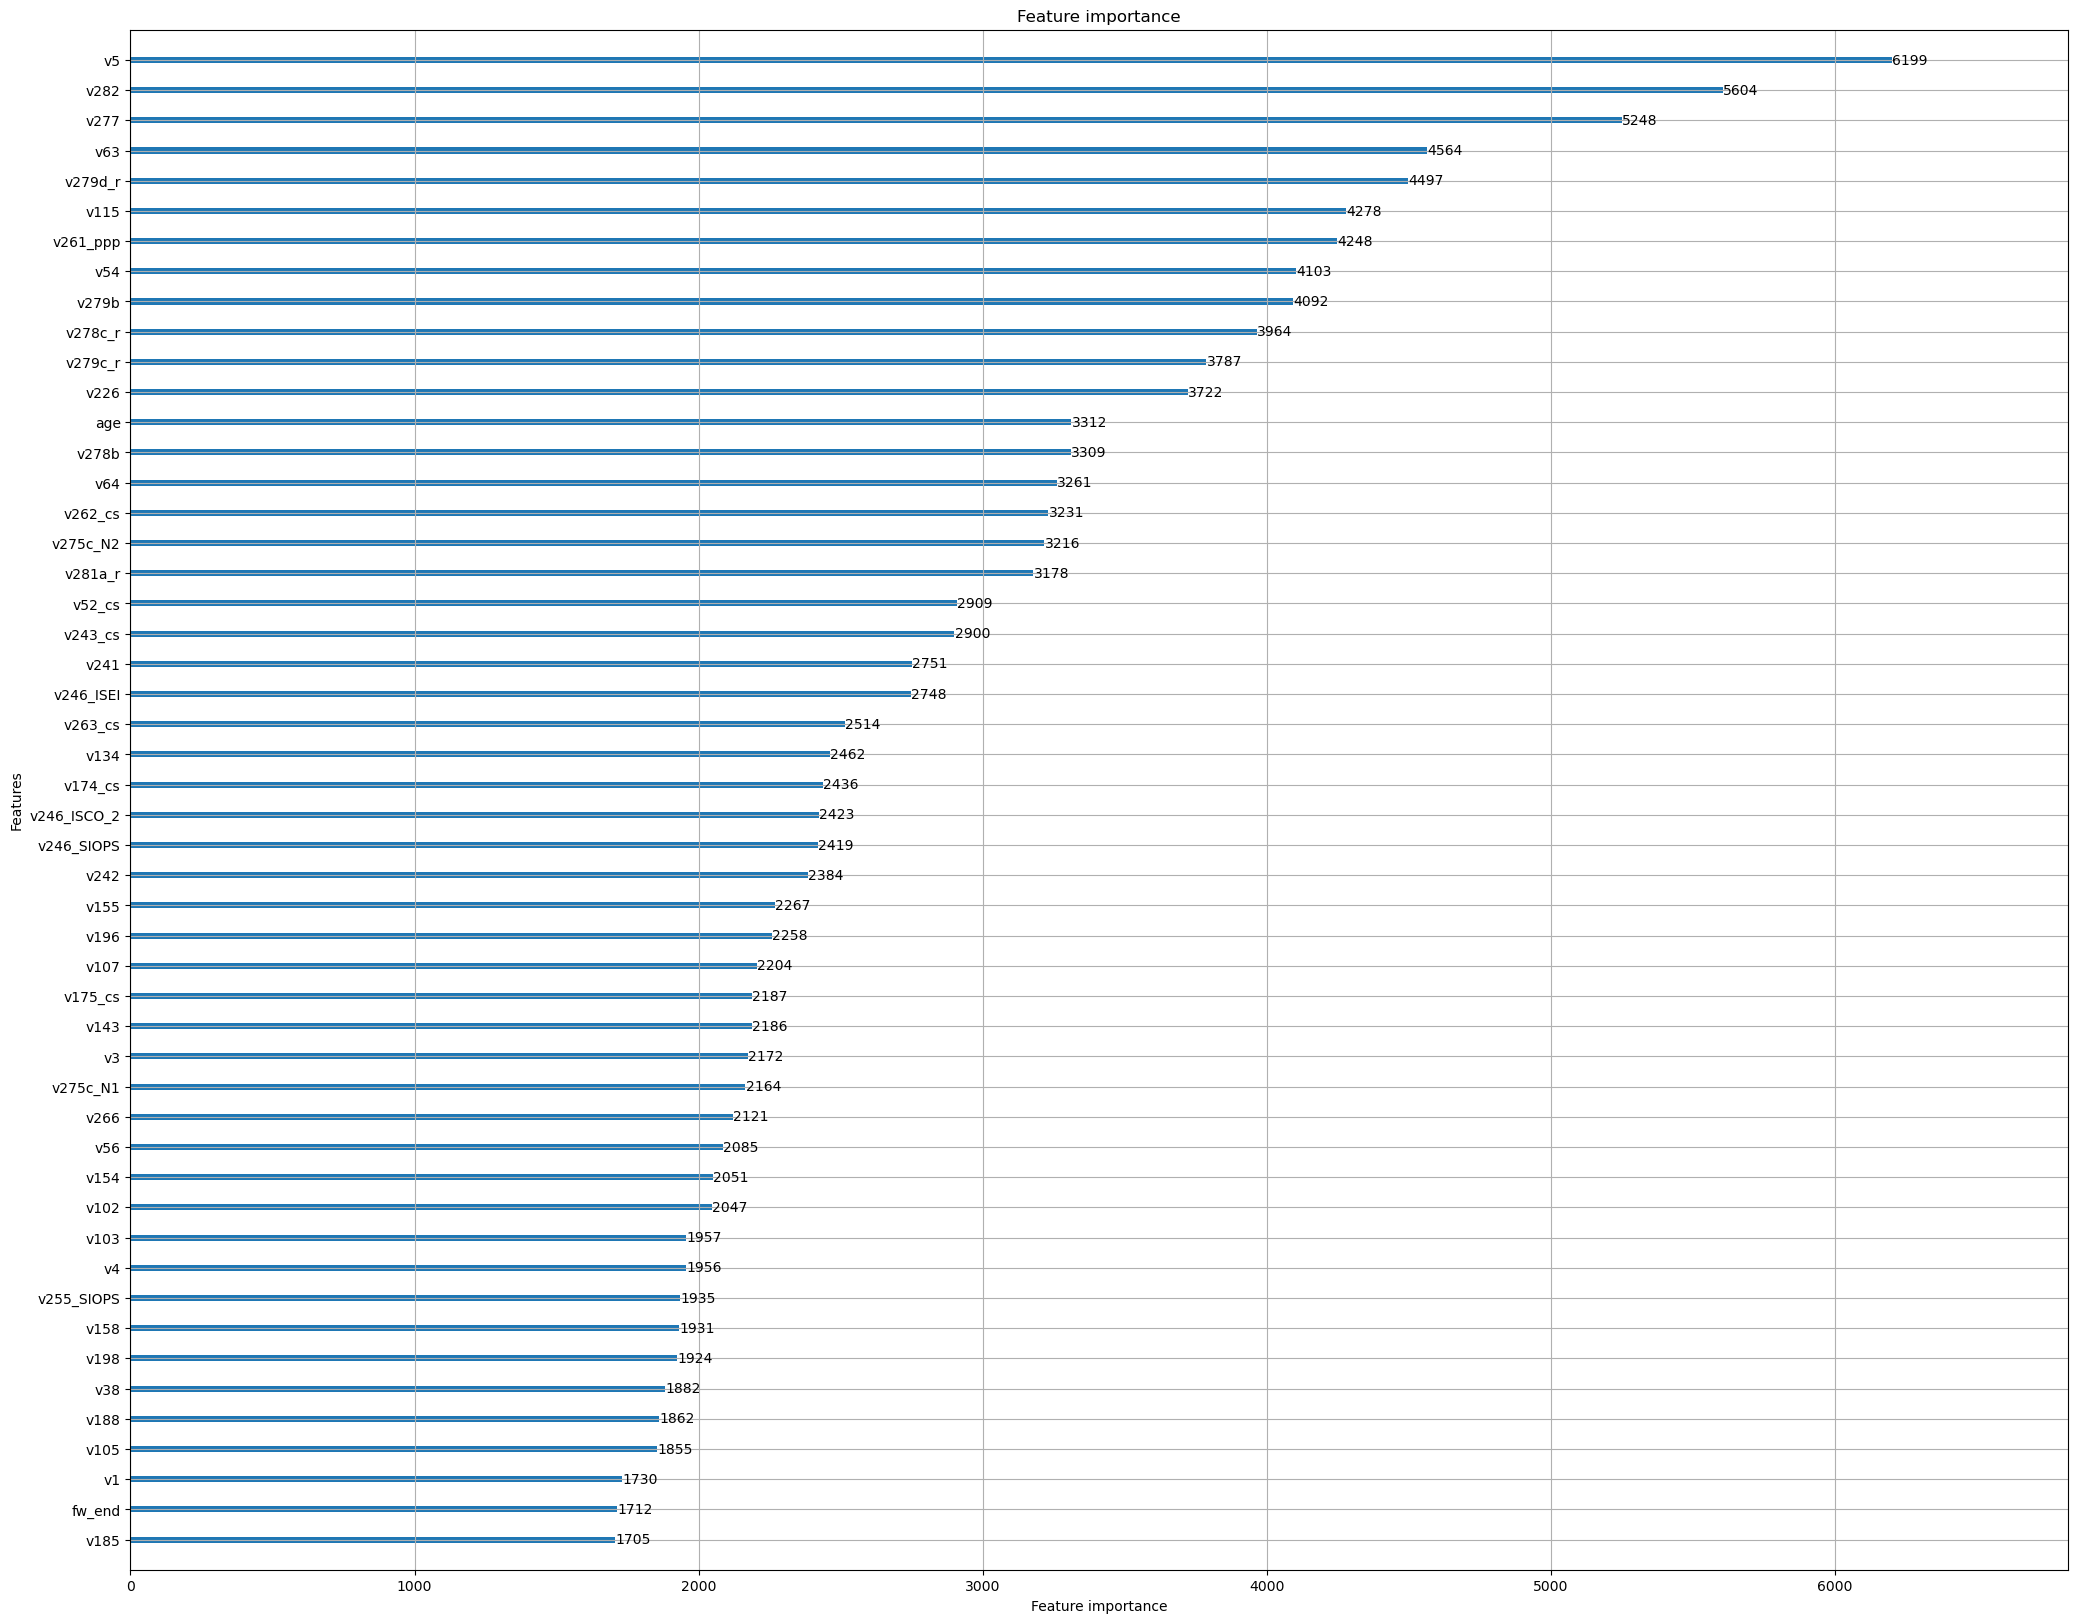

In [11]:
lgb.plot_importance(bst,  max_num_features=50, figsize=(25,20))